In [1]:
import skimage.data

image = skimage.data.camera()

print(f"Image shape: {image.shape}")
print(f"Image data type: {image.dtype}")

Image shape: (512, 512)
Image data type: uint8


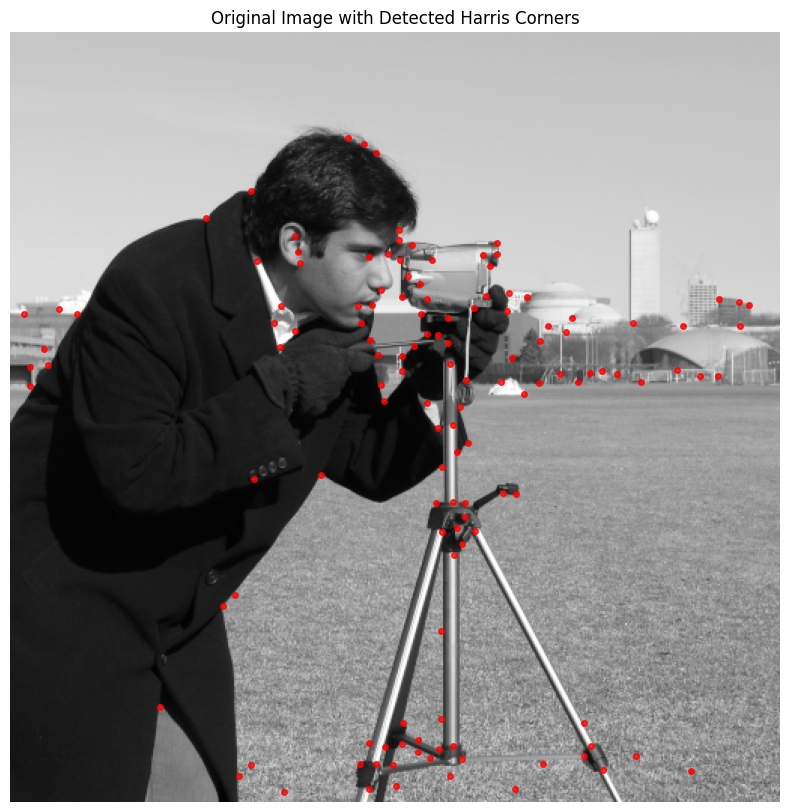

Number of detected corners: 133


In [2]:
import matplotlib.pyplot as plt
import skimage.color
import skimage.feature

# 2. Convert the loaded image to grayscale
grayscale_image = skimage.color.rgb2gray(image) if image.ndim == 3 else image.astype(float) / 255.0

# 3. Apply the Harris corner detector
harris_response = skimage.feature.corner_harris(grayscale_image)

# 4. Find the coordinates of the corners from the Harris response map
corners = skimage.feature.corner_peaks(harris_response, min_distance=5, threshold_rel=0.01)

# 5. Create a plot showing the original image and overlay detected corners
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.plot(corners[:, 1], corners[:, 0], 'ro', markersize=4, alpha=0.8)
plt.title('Original Image with Detected Harris Corners')
plt.axis('off')
plt.show()

print(f"Number of detected corners: {len(corners)}")

In [5]:
import cv2

print("OpenCV imported successfully.")

OpenCV imported successfully.


Number of detected SIFT keypoints (OpenCV): 791


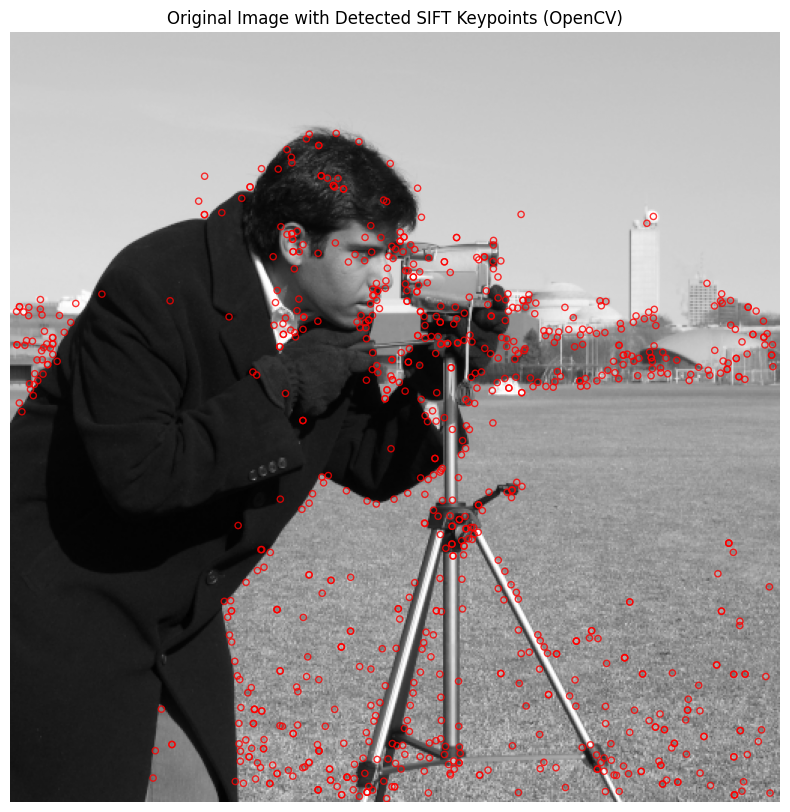

In [6]:
import matplotlib.pyplot as plt

# 2. Initialize the SIFT detector using cv2.SIFT_create()
sift = cv2.SIFT_create()

# 3. Detect keypoints and compute descriptors
# OpenCV expects a uint8 image for SIFT. Convert if necessary.
# The 'grayscale_image' is already normalized to [0, 1], so we need to scale it back to [0, 255] and convert to uint8.
image_for_sift = (grayscale_image * 255).astype('uint8')
keypoints_cv, descriptors_cv = sift.detectAndCompute(image_for_sift, None)

print(f"Number of detected SIFT keypoints (OpenCV): {len(keypoints_cv)}")

# 4. Create a plot showing the original image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray') # Use the original 'image' for display

# 5. Iterate through the detected keypoints and draw circles
for kp in keypoints_cv:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    radius = int(kp.size / 2) # Use kp.size for radius, which is the diameter of the keypoint
    cv2.circle(image, (x, y), radius, (255, 0, 0), 1) # Draw circle on the 'image' (can't draw directly on plt.imshow) - this will modify original image

# To overlay correctly on matplotlib, we can draw on a copy or create separate circles
# A better way for matplotlib visualization:
# For matplotlib, we can plot individual circles or use a scatter plot.
# Let's use a scatter plot for simplicity and clear visualization without modifying the original image.
x_coords = [kp.pt[0] for kp in keypoints_cv]
y_coords = [kp.pt[1] for kp in keypoints_cv]
plt.scatter(x_coords, y_coords, s=20, edgecolors='r', facecolors='none', alpha=0.8)

# 6. Set the plot title
plt.title('Original Image with Detected SIFT Keypoints (OpenCV)')

# 7. Turn off the axes and display the plot
plt.axis('off')
plt.show()